# <span style="color: crimson">Статистический анализ данных</span>
---
**<span style="color: crimson">Заказчик</span>**: компания «Мегалайн».  
**<span style="color: crimson">Цель анализа</span>**: определить самый выгодный для компании тариф.  
**<span style="color: crimson">Датасет</span>**: небольшая выборка клиентов.

---

<h3>Описание тарифов:</h3>

<b>|Тариф «Смарт»</b>

* Ежемесячная плата: 550 рублей

* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

* Стоимость услуг сверх тарифного пакета:
    1. минута разговора: 3 рубля
    2. сообщение: 3 рубля 
    3. 1 Гб интернет-трафика: 200 рублей.

<b>|Тариф «Ультра»</b>

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
1. минута разговора: 1 рубль
2. сообщение: 1 рубль
3. Гб интернет-трафика: 150 рублей.

||| Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт.

<hr>

### **Описание данных**  
<hr>
Таблица <span style="color: red"><b>users </b></span>(информация о пользователях):

* <span style="color: red"><b>user_id</b></span>— уникальный идентификатор пользователя
* <span style="color: red"><b>first_name </b></span>— имя пользователя
* <span style="color: red"><b>last_name </b></span>— фамилия пользователя
* <span style="color: red"><b>age </b></span>— возраст пользователя (годы)
* <span style="color: red"><b>reg_date </b></span>— дата подключения тарифа (день, месяц, год)
* <span style="color: red"><b>churn_date </b></span>— дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* <span style="color: red"><b>city </b></span>— город проживания пользователя
* <span style="color: red"><b>tarif </b></span>— название тарифного плана
<hr>

Таблица <span style="color: red"><b>calls </b></span>(информация о звонках):
    
* <span style="color: red"><b>id</b></span>— уникальный номер звонка
* <span style="color: red"><b>call_date </b></span>— дата звонка
* <span style="color: red"><b>duration </b></span>— длительность звонка в минутах
* <span style="color: red"><b>user_id</b></span>— идентификатор пользователя, сделавшего звонок
<hr>

Таблица <span style="color: red"><b>messages </b></span>(информация о сообщениях):

* <span style="color: red"><b>id</b></span> — уникальный номер сообщения

* <span style="color: red"><b>message_date </b></span>— дата сообщения

* <span style="color: red"><b>user_id</b></span>— идентификатор пользователя, отправившего сообщение
<hr>


Таблица <span style="color: red"><b>internet </b></span>(информация об интернет-сессиях):

* <span style="color: red"><b>id</b></span> — уникальный номер сессии

* <span style="color: red"><b>mb_used </b></span>— объём потраченного за сессию интернет-трафика (в мегабайтах)

* <span style="color: red"><b>session_date </b></span>— дата интернет-сессии

* <span style="color: red"><b>user_id</b></span> — идентификатор пользователя
<hr>


Таблица <span style="color: red"><b>tariffs </b></span>(информация о тарифах):

* <span style="color: red"><b>tariff_name </b></span>— название тарифа

* <span style="color: red"><b>rub_monthly_fee </b></span>— ежемесячная абонентская плата в рублях

* <span style="color: red"><b>minutes_included </b></span>— количество минут разговора в месяц, включённых в абонентскую плату

* <span style="color: red"><b>messages_included </b></span>— количество сообщений в месяц, включённых в абонентскую плату

* <span style="color: red"><b>mb_per_month_included </b></span>— объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

* <span style="color: red"><b>rub_per_minute </b></span>— стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

* <span style="color: red"><b>rub_per_message</b></span>— стоимость отправки сообщения сверх тарифного пакета

* <span style="color: red"><b>rub_per_gb </b></span>— стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


## Импорт библиотек:

In [1]:
!pip install sidetable

In [2]:
import pandas as pd
import sidetable as stb
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [3]:
# Отключаем обрезание колонок.
pd.set_option('display.max_columns', None)
# Округление чисел до 2 знаков после запятой. 
pd.set_option('display.float_format', '{:.2f}'.format)

## <span style="color: crimson">Этап 1</span> Изучение данных

Импортируем таблицы.

In [4]:
users = pd.read_csv("./users.csv", parse_dates=["churn_date", "reg_date"])
calls = pd.read_csv("./calls.csv", parse_dates=["call_date"])
messages = pd.read_csv("./messages.csv", parse_dates=["message_date"])
internet = pd.read_csv("./internet.csv", parse_dates=["session_date"], index_col=0)
tariffs = pd.read_csv("./tariffs.csv")


<hr>

<h3><b>Таблица: <span style="color: red">users</span> (информация о пользователях):<a class="tocSkip"></a>
</b></h4>

<span style="color: red">|</span> Осмотрим набор данных

In [5]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Нужно исправить:**
1. Заменить названия столбцов на более понятные.
2. Изменить порядок столбцов для лучшей читаемости.

In [7]:
# Переименовываем столбцы и меняем их расположение.
new_columns = {'reg_date'    : 'data_start',
               'churn_date'  : 'data_end'}

users.rename(columns=new_columns, 
             inplace=True)

users = users[['user_id',
               'first_name',
               'last_name',
               'age',
               'city',
               'data_start',
               'data_end',
               'tariff']]

---

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   data_start  500 non-null    datetime64[ns]
 6   data_end    38 non-null     datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


<b>Поменяет тип данных:</b>
   *  <pre><b>age</b>        - uint8</pre>

<span style="color: red">|</span> Заменить некорректные типы данных

In [9]:
users['age'] = users['age'].astype('uint8')

<span style="color: red">|</span> Найти и обработать пропуски

In [10]:
users.stb.missing(style=True, clip_0=True)

,missing,total,percent
data_end,462,500,92.40%


Пропуски в data_end означают, что тарифом до сих пор пользуются, так что пропуски остаются на своем месте.

<span style="color: red">|</span> Поиск и удаление дубликатов.

In [11]:
users.duplicated().sum()

0

<span style="color: red">|</span>  Иследование данных

In [12]:
display(users['data_start'].dt.date.min())
display(users['data_start'].dt.date.max())

datetime.date(2018, 1, 1)

datetime.date(2018, 12, 31)

Взглянем на распределение тарифов по возрастам абонентов.

In [13]:
users.groupby('tariff')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,351.00,46.46,16.58,18.00,32.00,47.00,62.00,75.00
ultra,149.00,46.90,16.92,18.00,31.00,46.00,63.00,75.00


**Вывод:**

Оба тарифа распределены равномерно и не иммеют ярко выраженных особенностей, время за которое собраны данные 1 год (2018).

<hr>

<h3><b>| Таблица: <span style="color: red">calls</span> (информация о звонках):
</b><a class="tocSkip"></a></h2>

<span style="color: red">|</span> Осмотрим набор данных

In [14]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


**Нужно исправить:**
1. Длительность звонка нужно округлить в большую сторону.
2. Заменить  id (уникальный идентификатор звонка)  на call_id

In [15]:
calls['duration'] = calls['duration'].apply(math.ceil)

In [16]:
# Переименовываем столбцы и меняем их расположение.
new_columns = {'id'      : 'call_id',
               'duration': 'call_duration'}
calls.rename(columns=new_columns, inplace=True)

---

In [17]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   call_id        202607 non-null  object        
 1   call_date      202607 non-null  datetime64[ns]
 2   call_duration  202607 non-null  int64         
 3   user_id        202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


<b>Поменяет тип данных:</b>
   *  <pre><b>call_date</b> - datetime</pre>
   *  <pre><b>duration</b>  - uint32</pre>

<span style="color: red">|</span> Заменить некорректные типы данных

In [18]:
calls['call_duration']  = calls['call_duration'].astype('uint32')

<span style="color: red">|</span> Найти и обработать пропуски

In [19]:
calls.stb.missing(style=True, clip_0=True)

,missing,total,percent


<span style="color: red">|</span> Найти и обработать дубликаты.

In [20]:
calls.duplicated().sum()

0

<span style="color: red">|</span>  Иследование данных

In [21]:
calls.describe()

,call_duration,user_id
count,202607.00,202607.00
mean,7.16,1253.94
std,5.96,144.72
min,0.00,1000.00
25%,2.00,1126.00
50%,6.00,1260.00
75%,11.00,1379.00
max,38.00,1499.00


Минимальная продолжительность звонка равна 0, взглянем поближе:

In [22]:
calls.sort_values(by=['user_id','call_date'], ascending=True).head(20)

,call_id,call_date,call_duration,user_id
38,1000_38,2018-05-25,0,1000
78,1000_78,2018-05-26,11,1000
113,1000_113,2018-05-26,7,1000
133,1000_133,2018-05-26,5,1000
194,1000_194,2018-05-26,14,1000
335,1000_335,2018-05-26,2,1000
338,1000_338,2018-05-26,11,1000
274,1000_274,2018-05-27,4,1000
11,1000_11,2018-05-28,19,1000
124,1000_124,2018-05-28,0,1000


Не видно явной корреляции, между duration = 0 и другими параметрами.

**Сгруппируем данные по пользователям и посмотрим на статистику времени использования сотовой связи.**

In [23]:
calls.groupby(["user_id"]).sum()["call_duration"].describe().to_frame()

,call_duration
count,492.00
mean,2947.77
std,2091.00
min,66.00
25%,1291.50
50%,2478.00
75%,4227.00
max,12973.00


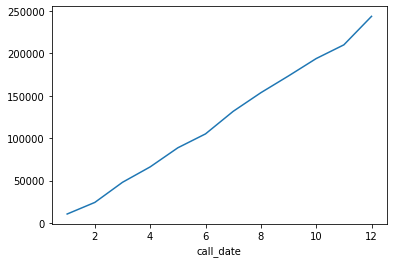

In [24]:
calls.groupby([calls.call_date.dt.month])['call_duration'].agg('sum').plot();

**Выводы:**
* 8 пользователей не использует мобильную связь.
* Потребление трафика увеличивается с каждым месяцем.
* Продолжительность звонков равная 0, могла возникнуть из-за того, что звонок сбросили до того, как его подняли.

<h3><b>Таблица: <span style="color: red">messages</span> (информация о сообщениях):
</b><a class="tocSkip"></a></h2>

<span style="color: red">|</span> Осмотрим набор данных

In [25]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


**Нужно исправить:**
1. Заменить id (уникальный идентификатор сообщения)  на message_id

In [26]:
# Переименовываем столбцы и меняем их расположение.
new_columns = {'id' : 'message_id'}
messages.rename(columns=new_columns, inplace=True)

In [27]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   message_id    123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


<b>Поменяет тип данных:</b>
   *  <pre><b>message_date</b> - datetime</pre>
   *  <pre><b>user_id</b>  - uint32</pre>

<span style="color: red">|</span> Заменить некорректные типы данных

In [28]:
messages['user_id'] = messages['user_id'].astype('uint32')

<span style="color: red">|</span> Найти и обработать пропуски

In [29]:
messages.stb.missing(style=True, clip_0=True)

,missing,total,percent


<span style="color: red">|</span> Найти и обработать дубликаты.

In [30]:
messages.duplicated().sum()

0

<span style="color: red">|</span>  Иследование данных

In [31]:
display(messages['message_date'].dt.date.min())
display(messages['message_date'].dt.date.max())

datetime.date(2018, 1, 2)

datetime.date(2018, 12, 31)

**Сгруппируем данные по пользователям и посмотрим на статистику по к-ву сооющений.**

In [32]:
messages.groupby(['user_id']).count()['message_id'].describe().to_frame()

,message_id
count,426.00
mean,288.82
std,267.61
min,1.00
25%,85.75
50%,215.50
75%,414.00
max,1463.00


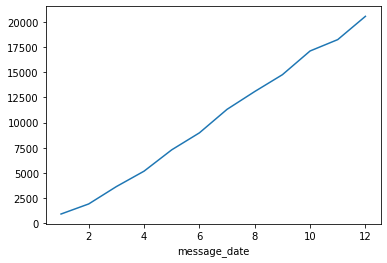

In [33]:
messages.groupby([messages.message_date.dt.month])['message_id'].agg('count').plot();

**Вывод:**

* С учетом, что данные собраны за год, то среднее значение в 215 оправдано (хотя я не разу не испольщовал смс).
* Количество смс также растет.

<h3><b>Таблица: <span style="color: red">internet</span> (информация об интернет-сессиях):
</b></b><a class="tocSkip"></a></h2>

<span style="color: red">|</span> Осмотрим набор данных

In [34]:
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


**Нужно исправить:**
1. mb_used (объём потраченного за сессию интернет-трафика (в мегабайтах)) перевести в гб на internet_gb_used
2. Заменить:
   * id (уникальный идентификатор звонка)  на internet_id
   * session_date на internet_session_date

In [35]:
# Переименовываем столбцы и меняем их расположение.
new_columns = {
               'id'           : 'internet_id',
               'mb_used'      : 'internet_mb_used',
               'session_date' : 'internet_date'
              }
internet.rename(columns=new_columns, inplace=True)

internet = internet[['user_id','internet_id','internet_date','internet_mb_used']]

---

In [36]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           149396 non-null  int64         
 1   internet_id       149396 non-null  object        
 2   internet_date     149396 non-null  datetime64[ns]
 3   internet_mb_used  149396 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [37]:
internet.describe()

,user_id,internet_mb_used
count,149396.00,149396.00
mean,1252.10,370.19
std,144.05,278.30
min,1000.00,0.00
25%,1130.00,138.19
50%,1251.00,348.01
75%,1380.00,559.55
max,1499.00,1724.83


<span style="color: red">|</span> Заменить некорректные типы данных

In [38]:
internet['user_id'] = internet['user_id'].astype('uint32')

<span style="color: red">|</span> Найти и обработать пропуски

In [39]:
internet.stb.missing(style=True)

,missing,total,percent
user_id,0,"149,396",0.00%
internet_id,0,"149,396",0.00%
internet_date,0,"149,396",0.00%
internet_mb_used,0,"149,396",0.00%


<span style="color: red">|</span> Удалить дубликаты.

In [40]:
internet.duplicated().sum()

0

<span style="color: red">|</span>  Иследование данных

In [41]:
internet.groupby(['user_id']).sum()['internet_mb_used'].count()

497

**Сгруппируем данные по пользователям и посмотрим на статистику использования интернета.**

In [42]:
internet.groupby(["user_id"]).sum()["internet_mb_used"].apply(
    lambda x: x / 1024
).sort_values(ascending=False).to_frame()

,internet_mb_used
user_id,
1385,367.58
1240,367.42
1180,340.05
1185,335.48
1330,328.49
...,...
1406,11.16
1069,11.08
1062,10.81


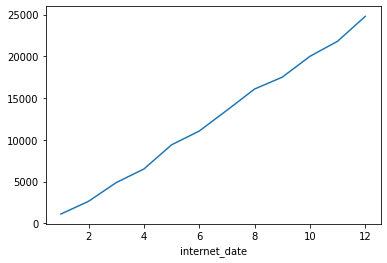

In [43]:
internet.groupby([internet.internet_date.dt.month])['internet_mb_used'].agg('count').plot();

**Вывод:**

* Из 500 пользователей, только 3 не пользуются интернетом, все остальные используют от 4 до 367 гб.
* internet_mb_used (объём потраченного за сессию интернет-трафика (в мегабайтах)) с каждым месяцем увеличивается.
* Значение internet_mb_used равное 0 могло возникнуть из-за того, что человек включил мобильный интернет, но не использовал его.

<h3><b>Таблица: <span style="color: red">tariffs</span> (информация о тарифах):
</b></b><a class="tocSkip"></a></h2>

<span style="color: red">|</span> Осмотрим набор данных

In [44]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [45]:
# Переименовываем столбцы и меняем их расположение.
new_columns = {
               'mb_per_month_included': 'internet_mb_included',
               'rub_monthly_fee'      : 'monthly_price',
               'rub_per_gb'           : 'rub_add_gb',
               'rub_per_message'      : 'rub_add_message',
               'rub_per_minute'       : 'rub_add_minute',
               'tariff_name'          : 'tariff'
               }
tariffs.rename(columns=new_columns, inplace=True)

tariffs = tariffs[['messages_included','internet_mb_included',
                   'minutes_included' ,'monthly_price',
                   'rub_add_gb'       ,'rub_add_message',
                   'rub_add_minute'   ,'tariff']]

In [46]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   messages_included     2 non-null      int64 
 1   internet_mb_included  2 non-null      int64 
 2   minutes_included      2 non-null      int64 
 3   monthly_price         2 non-null      int64 
 4   rub_add_gb            2 non-null      int64 
 5   rub_add_message       2 non-null      int64 
 6   rub_add_minute        2 non-null      int64 
 7   tariff                2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Проблемы с типами данных могли возникнуть из-за того, что ячейки были изначально неверного типа, но т.к. все они имеют одинаковый формат(это выяснится ниже), то скорее всего проблема в способе выгрузки данных.

Пропуски  в таблицах с интернет трафиком, продолжительностью звонков и кол-вом сообщениями, вероятнее всего возникли, потому что пользователи не использовали эти услуг.

### <center><span style="color: crimson"><b>Вывод</b></span></center>
* Оба тарифа распределены равномерно и не иммеют ярко выраженных особенностей, время за которое собраны данные 1 год (2018).
* 8 пользователей не использует мобильную связь.
* Потребление трафика увеличивается с каждым месяцем.
* Продолжительность звонков равная 0, могла возникнуть из-за того, что звонок сбросили до того, как его подняли.
* Из 500 пользователей, только 3 не пользуются интернетом, все остальные используют от 4 до 367 гб.
* internet_mb_used (объём потраченного за сессию интернет-трафика (в мегабайтах)) с каждым месяцем увеличивается.
* Значение internet_mb_used равное 0 могло возникнуть из-за того, что человек включил мобильный интернет, но не использовал его.



**Нужно исправить:**

1. Длительность звонка нужно округлить в большую сторону.
2. Заменить id (уникальный идентификатор звонка) на call_id
1. Заменить названия столбцов на более понятные.
2. Изменить порядок столбцов для лучшей читаемости.
1. Заменить id (уникальный идентификатор сообщения) на message_id 
1. mb_used (объём потраченного за сессию интернет-трафика (в мегабайтах)) перевести в гб на internet_gb_used
2. Заменить:

   * id (уникальный идентификатор звонка)  на internet_id

   * session_date на internet_session_date



## <span style="color: crimson">Этап 2</span> Предобработка данных

<h3><b>Расчёт для каждого пользователя:</b><a class="tocSkip"></a></h3>

<b>1. <span style="color: red">К</span>оличество сделанных звонков и израсходованных минут разговора по месяцам</b>

In [47]:
user_calls = (
    calls.groupby([calls.user_id, calls.call_date.dt.month_name()])
    .agg({"call_id": "count", "call_duration": "sum"})
    .reset_index()
    .rename(
        columns={
            "call_date": "month",
            "call_duration": "month_calls_duration",
            "call_id": "calls_total_in_month",
        }
    )
)

In [48]:
user_calls.head(10)

,user_id,month,calls_total_in_month,month_calls_duration
0,1000,August,52,408
1,1000,December,46,333
2,1000,July,47,340
3,1000,June,43,172
4,1000,May,22,159
5,1000,November,43,338
6,1000,October,57,350
7,1000,September,58,466
8,1001,December,63,414
9,1001,November,59,430


Пропуски в таблицах с интернет трафиком, продолжительностью звонков и кол-вом сообщениями, вероятнее всего возникли, потому что пользователи не использовали эти услуги.

<b>2. <span style="color: red">К</span>оличество отправленных сообщений по месяцам;</b>  

In [49]:
user_messange = messages.groupby([messages.user_id, messages.message_date.dt.month_name()])\
                .agg({'message_id':'count'})\
                .reset_index()\
                .rename(columns={'message_date':'month','message_id':'message_count'})

In [50]:
user_messange.head(10)

,user_id,month,message_count
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22
5,1000,November,58
6,1000,October,73
7,1000,September,57
8,1002,August,13
9,1002,December,12


<b>3. <span style="color: red">О</span>бъем израсходованного интернет-трафика по месяцам</b> 

In [51]:
user_internet = internet.groupby([internet.user_id, internet.internet_date.dt.month_name()])\
                .agg({'internet_mb_used':'sum'})\
                .reset_index()\
                .rename(columns={'internet_date':'month','internet_mb_used':'total_mb_used_internet'})

In [52]:
user_internet.head(10)

,user_id,month,total_mb_used_internet
0,1000,August,14055.93
1,1000,December,9817.61
2,1000,July,14003.64
3,1000,June,23233.77
4,1000,May,2253.49
5,1000,November,14756.47
6,1000,October,14702.49
7,1000,September,14568.91
8,1001,December,14036.66
9,1001,November,18429.34


<b>4. <span style="color: red">П</span>омесячную выручку с каждого пользователя:</b>
* вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
* остаток умножьте на значение из тарифного плана; 
* прибавьте абонентскую плату, соответствующую тарифному плану.

In [53]:
total_table = user_internet.merge(user_messange, on=['user_id','month'], how='outer')\
                             .merge(user_calls, on=['user_id','month'], how='outer')\
                             .merge(users[['user_id','tariff','city']], on='user_id', how='outer')\
                             .merge(tariffs, on='tariff', how='outer')

In [54]:
total_table.head(10)

,user_id,month,total_mb_used_internet,message_count,calls_total_in_month,month_calls_duration,tariff,city,messages_included,internet_mb_included,minutes_included,monthly_price,rub_add_gb,rub_add_message,rub_add_minute
0,1000.00,August,14055.93,81.00,52.00,408.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000.00,December,9817.61,70.00,46.00,333.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000.00,July,14003.64,75.00,47.00,340.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000.00,June,23233.77,60.00,43.00,172.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000.00,May,2253.49,22.00,22.00,159.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
5,1000.00,November,14756.47,58.00,43.00,338.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
6,1000.00,October,14702.49,73.00,57.00,350.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
7,1000.00,September,14568.91,57.00,58.00,466.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
8,1003.00,August,8565.21,37.00,55.00,380.00,ultra,Москва,1000,30720,3000,1950,150,1,1
9,1003.00,December,10121.53,75.00,108.00,802.00,ultra,Москва,1000,30720,3000,1950,150,1,1


In [55]:
total_table["price_add_gb"] = (
    total_table["total_mb_used_internet"] - total_table["internet_mb_included"]
).apply(lambda x: math.ceil(x / 1024) if x >= 0 else 0) * total_table["rub_add_gb"]

total_table["price_add_message"] = (
    total_table["message_count"] - total_table["messages_included"]
).apply(lambda x: x if x >= 0 else 0) * total_table["rub_add_message"]

total_table["price_add_minute"] = (
    total_table["month_calls_duration"] - total_table["minutes_included"]
).apply(lambda x: x if x >= 0 else 0) * total_table["rub_add_minute"]

total_table["total_price"] = (
    total_table["monthly_price"]
    + total_table["price_add_gb"]
    + total_table["price_add_message"]
    + total_table["price_add_minute"]
)

In [56]:
total_table.stb.missing(style=True, clip_0=True)

,missing,total,percent
message_count,499,"3,216",15.52%
calls_total_in_month,42,"3,216",1.31%
month_calls_duration,42,"3,216",1.31%
total_mb_used_internet,13,"3,216",0.40%
month,2,"3,216",0.06%


Пропуски заполним нулями, примим их, за отсутствие использования связи, интернета и сообщений.

In [57]:
total_table["message_count"] = total_table["message_count"].fillna(0)
total_table["calls_total_in_month"] = total_table["calls_total_in_month"].fillna(0)
total_table["month_calls_duration"] = total_table["month_calls_duration"].fillna(0)
total_table["total_mb_used_internet"] = total_table["total_mb_used_internet"].fillna(0)

## <span style="color: crimson">Этап 3</span>  Анализ

<b>1. <span style="color: red">С</span>колько минут разговора требуется пользователям каждого тарифа в месяц?</b>

In [58]:
total_table.groupby(['tariff'])['month_calls_duration']\
           .agg(['median','mean','var','std','count'])

,median,mean,var,std,count
tariff,,,,,
smart,421.50,417.75,36281.39,190.48,2230
ultra,518.00,526.09,101052.49,317.89,986


Text(0.5, 1.0, 'smart - Время разговоров по телефону.')

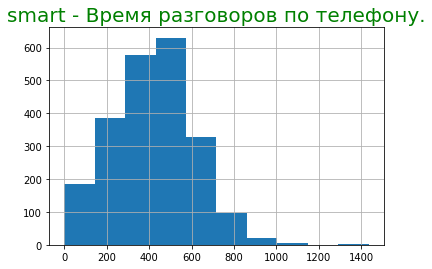

In [59]:
total_table.loc[total_table["tariff"] == "smart"]["month_calls_duration"].hist()
plt.title(
    "smart - Время разговоров по телефону.", fontdict={"size": 20, "color": "green"}
)

Text(0.5, 1.0, 'ultra - Время разговоров по телефону.')

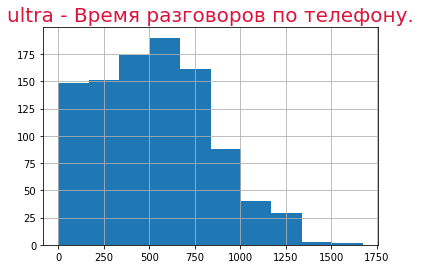

In [60]:
total_table.loc[total_table["tariff"] == "ultra"]["month_calls_duration"].hist()
plt.title(
    "ultra - Время разговоров по телефону.", fontdict={"size": 20, "color": "crimson"}
)

**Выводы**:
* Пользователи тарифа **smart** используют около <u>410 минут</u> в месяц.
* Пользователи тарифа **ultra** используют около <u>520 минут</u> в месяц.

<b>2. <span style="color: red">С</span>колько сообщений требуется пользователям каждого тарифа в месяц?</b> 

In [61]:
total_table.groupby(['tariff'])['message_count']\
           .agg(['median','mean','var','std','count'])

,median,mean,var,std,count
tariff,,,,,
smart,28.00,33.37,796.96,28.23,2230
ultra,38.00,49.31,2285.42,47.81,986


Text(0.5, 1.0, 'smart - Кол-во сообщений.')

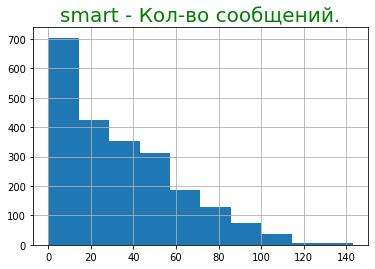

In [62]:
total_table.loc[total_table["tariff"] == "smart"]["message_count"].hist()
plt.title("smart - Кол-во сообщений.", fontdict={"size": 20, "color": "green"})

Text(0.5, 1.0, 'ultra  - Кол-во сообщений.')

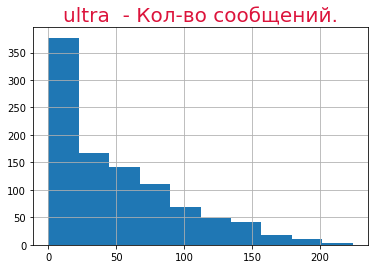

In [63]:
total_table.loc[total_table["tariff"] == "ultra"]["message_count"].hist()
plt.title("ultra  - Кол-во сообщений.", fontdict={"size": 20, "color": "crimson"})

**Выводы**:
* Пользователи тарифа **smart** используют около <u>30 сообщений</u> в месяц.
* Пользователи тарифа **ultra** используют около <u>45 сообщений</u> в месяц.

<b>3. <span style="color: red">К</span>акой объём интернет-трафика требуется пользователям каждого тарифа в месяц? </b> 

In [64]:
total_table.groupby(['tariff'])['total_mb_used_internet']\
           .agg(['median','mean','var','std','count'])

,median,mean,var,std,count
tariff,,,,,
smart,16505.47,16201.12,34564843.48,5879.19,2230
ultra,19304.02,19449.06,102032129.46,10101.10,986


Text(0.5, 1.0, 'smart  - Расход интернета в мб.')

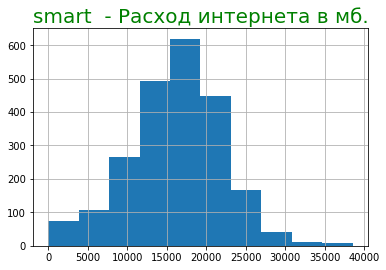

In [65]:
total_table[total_table["tariff"] == "smart"]["total_mb_used_internet"].hist()
plt.title("smart  - Расход интернета в мб.", fontdict={"size": 20, "color": "green"})

Text(0.5, 1.0, 'ultra  - Расход интернета в мб.')

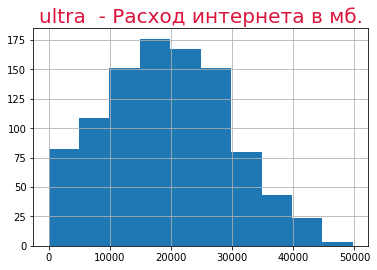

In [66]:
total_table[total_table["tariff"] == "ultra"]["total_mb_used_internet"].hist()
plt.title("ultra  - Расход интернета в мб.", fontdict={"size": 20, "color": "crimson"})

**Выводы**:
* Пользователи тарифа **smart** используют около <u>16 гб</u> в месяц.
* Пользователи тарифа **ultra** используют около <u>19 гб</u> в месяц.

<b>4. <span style="color: red">К</span>акую выручку приносит объём пользователь каждого тарифа в месяц?</b> 

In [67]:
total_table.groupby(['tariff'])['total_price']\
           .agg(['median','mean','var','std','count'])

,median,mean,var,std,count
tariff,,,,,
smart,1021.00,1289.64,669730.76,818.37,2230
ultra,1950.00,2070.03,141387.71,376.02,986


**Выводы**:
* Пользователи тарифа **smart** тратят около <u>1100</u> в месяц.
* Пользователи тарифа **ultra** тратят около <u>1950</u> в месяц.

## <span style="color: crimson">Этап 4</span> Проверка гипотез

**Средняя выручка <u>от</u> пользователей тарифов «Ультра» и «Смарт» различаются.**  
**H0**: Среднее значение выпучки от пользователей ultra **<span style="color: red">==</span>** Среднему значению выпучки от пользователей smart   
**H1**: Среднее значение выпучки от пользователей ultra **<span style="color: red">!=</span>** Среднему значению выпучки от пользователей smart  

Воспользуемся T-тестом, т.к: 
1. Так как проверка на различие, то используем двусторонний тест.
2. Мы сравниваем среднее двух независимых выборок.

In [68]:
smart_total_price = total_table[total_table['tariff'] == 'smart']['total_price']
ultra_total_price = total_table[total_table['tariff'] == 'ultra']['total_price']


alpha = 0.05  # Ошибка первого рода не приведет к проблемам, поэтому можно взять 5% (10% слишком уж жирно)

results = st.ttest_ind(smart_total_price, ultra_total_price, equal_var = False)

print('p-значение: {:.5f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.00000
Отвергаем нулевую гипотезу


**Вывод:**  
Выручка от пользователей разных тарифов точно отличается.

<hr>

**Средняя выручка от пользователей тарифов из Москвы и пользователей из других регионов различаются.**  
**H0**: Среднее значение выпучки от пользователей из Москвы **<span style="color: red">==</span>** Среднему значению выпучки от пользователей из других регионов.   
**H1**: Среднее значение выпучки от пользователей из Москвы **<span style="color: red">!=</span>** Среднему значению выпучки от пользователей из других регионов.   

In [69]:
moscow_total_price    = total_table[total_table['city'] == 'Москва']['total_price']
no_moscow_total_price = total_table[total_table['city'] != 'Москва']['total_price']

alpha = 0.05  # Ошибка первого рода не приведет к проблемам, поэтому можно взять 5% (10% слишком уж жирно)

results = st.ttest_ind(moscow_total_price, no_moscow_total_price, equal_var = False)

print('p-значение: {:.5f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.52170
Не получилось отвергнуть нулевую гипотезу


**Вывод:**  
Выручка от пользователей в Москве и за её пределами одинакова.

## <span style="color: crimson">Этап 5</span> Результаты исследований

**Наблюдений:**
* На обоих тарифах мало кто использует СМС.
* Пользователи тарифа smart переплачивают, стоит это поправить т.к. пользователь у которого оплата значительно превышает  стоимость за тариф, может быть недоволен и перейти на другого оператора.
* Кол-во денег от клиента зависит от тарифа и не зависит от того живет пользователь в столице или за её пределами, значит на выручку не сильно влияет уровень дохода клиента.
* Если продолжительность звонка и объем интернет сессии равны 0, то их не стоит записывать. (оставить значение NaN) 

**Среднее использование трафика на разных трафиках:**
* Пользователи тарифа **smart** используют около <u>16 гб</u>, 410 минут, 30 сообщения, тратят около 1100 руб в месяц.
* Пользователи тарифа **ultra**   используют около <u>19 гб</u>, 520 минут, 45 сообщений, тратят около 1950 руб в месяц.

**Ответ на основной вопрос:**
* Для оператора тариф ultra выгоднее т.к. средняя прибыль на 800 руб. выше, хотя пользователей тарифа smart больше. 
* От тарифа ultra прибыль 1922700 руб, а smart прибыль 1226500 руб.